## TAREFA 3 - MODELOS DE MACHINE LEARNING - UNISINOS - 10-2019
## Customer Churn em uma Operadora de Telecom
## MARCIO DE LIMA

A tarefa contempla o desenvolvimento e a construção de um projeto para implantação de um ou mais modelos de aprendizagem de máquina para solucionar o case apresentado nas tarefas anteriores.  


# Introdução e Objetivos

O objetivo desse trabalho é demonstrar a aplicação de machine learning num processo de negócio conhecido como Customer Churn numa operadora de Telecom e como essa aplicação / adoção propricia ganhos ou economias para o negócio.
Customer Churn (ou Rotatividade de Clientes, em uma tradução livre) refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento comercial. Refere-se também à perda de clientes.
Neste processo a empresa conseguirá “prever” se um cliente tende a cancelar seus serviços já contratados ou se ele tende a manter o contrato, através desses resultados a empresa poderá agir para evitar o cancelamento (Churn) via promoções, ofertas ou até mesmo, ter  insights de melhoria dos serviços existentes para evitar a perda de clientes e ganhar novos. 

# Dicionário de Dados

Cada linha do dataset representa um cliente da empresa de Telecom e cada coluna contém os atributos, serviços e características desse cliente. 
Esse dataset contêm 7043 linhas (clientes) e 21 colunas. Cada coluna é descrita abaixo. A coluna "Churn" é o nosso alvo / target.

Fonte do DataSet => https://www.kaggle.com/blastchar/telco-customer-churn


In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Importando o dataSet
df = pd.read_csv('data/dataset.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# Visualizando as tipagens das colunas, o object significa String
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Informações gerais do dataset e consumo de memória do mesmo. O dataset possui 7043 linhas (clientes).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#Verificando se existem dados null
df.isnull().values.any() 

False

In [7]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [8]:
# Tratamento de Dados Missing não necessário

#Salvando uma copia do dataset para a montagem dos gráficos
df_grafico = df.copy()

In [9]:
# Transformando as colunas String em números para futuro processamento do modelo preditivo. 
from sklearn.preprocessing import LabelEncoder

labelencoder_columns = LabelEncoder()
df['gender'] = labelencoder_columns.fit_transform(df['gender'])
df['Partner'] = labelencoder_columns.fit_transform(df['Partner'])
df['Dependents'] = labelencoder_columns.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder_columns.fit_transform(df['PhoneService'])
df['MultipleLines'] = labelencoder_columns.fit_transform(df['MultipleLines'])
df['InternetService'] = labelencoder_columns.fit_transform(df['InternetService'])
df['OnlineSecurity'] = labelencoder_columns.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder_columns.fit_transform(df['OnlineBackup'])
df['TechSupport'] = labelencoder_columns.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder_columns.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder_columns.fit_transform(df['StreamingMovies'])
df['DeviceProtection'] = labelencoder_columns.fit_transform(df['DeviceProtection'])
df['Contract'] = labelencoder_columns.fit_transform(df['Contract'])
df['PaperlessBilling'] = labelencoder_columns.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = labelencoder_columns.fit_transform(df['PaymentMethod'])
df['Churn'] = labelencoder_columns.fit_transform(df['Churn'])

#Apagando a coluna customerID pois ela não representa um dado válido para o modelo preditivo. 
df = df.drop('customerID', axis=1)

# Resolvendo o problema de espaços em branco na coluna TotalCharges
df['TotalCharges'] = df['TotalCharges'].map(lambda x: 0.0 if x == ' ' else x )

#Ajustando o tipo da coluna TotalCharges para float
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, downcast='float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


# Análise Descritiva dos dados

In [10]:
#Dados estatisticos - analise descritiva das colunas do Dataset
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794471,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.549988,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550049,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.599976,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.799805,1.000000


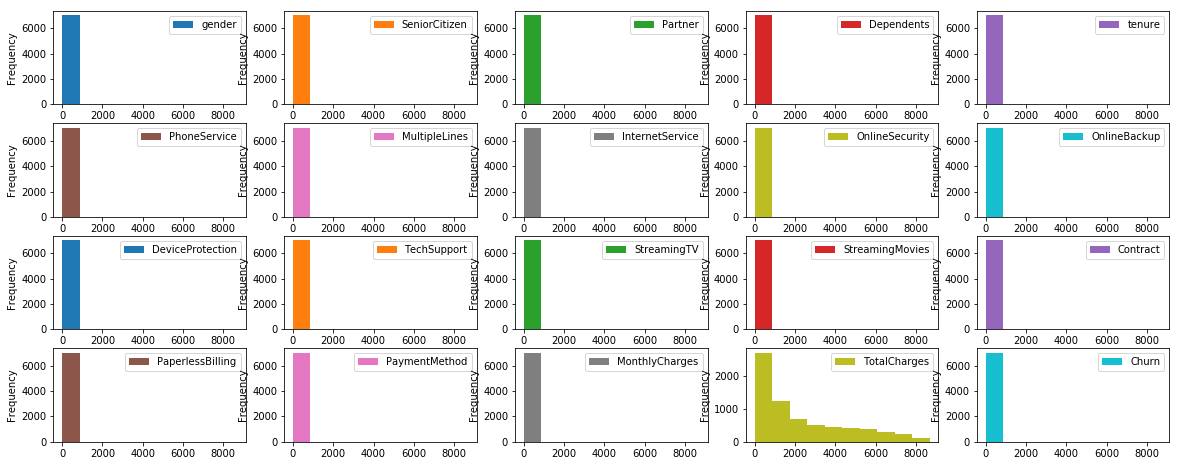

In [11]:
#Histogramas
df.plot(kind = 'hist', subplots = True, layout = (5,5), sharex = False, figsize=(20,10))
plt.show()

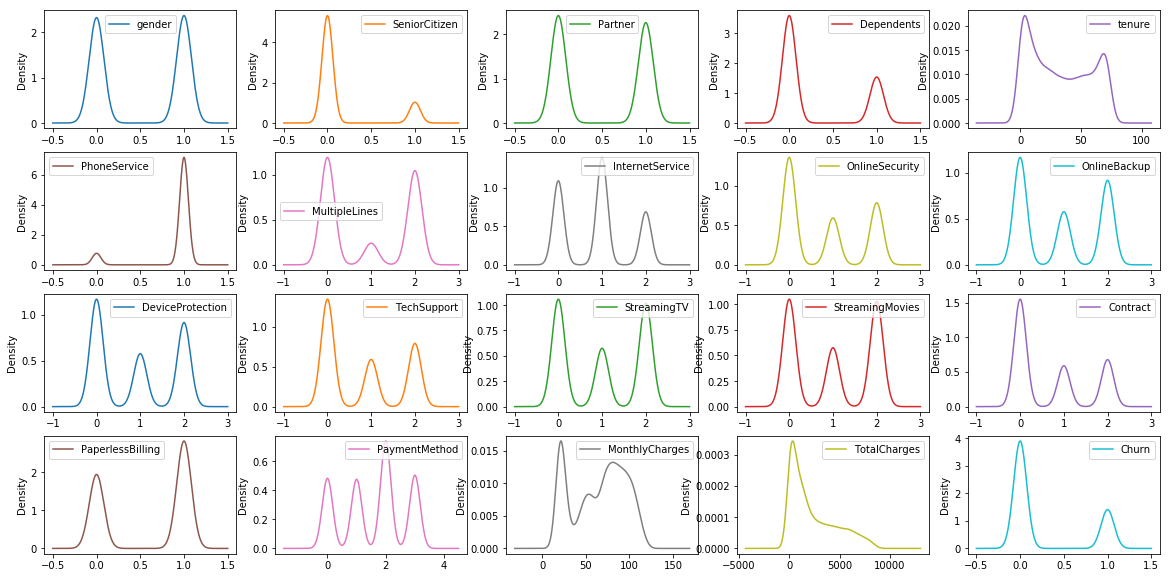

In [12]:
#Gráfico de Densidade
df.plot(kind = 'density', subplots = True, layout = (4,5), sharex = False, figsize=(20,10))
plt.show()

Através dos gráficos acima verificamos a proporção / distribuição dos dados por coluna. Podemos verificar que a proporção de gênero (Masculino e Femino) é bem balanceada, poucos clientes são idosos, a maioria dos clientes não tem dependentes, a maioria dos clientes tem o serviço de telefone, etc. 

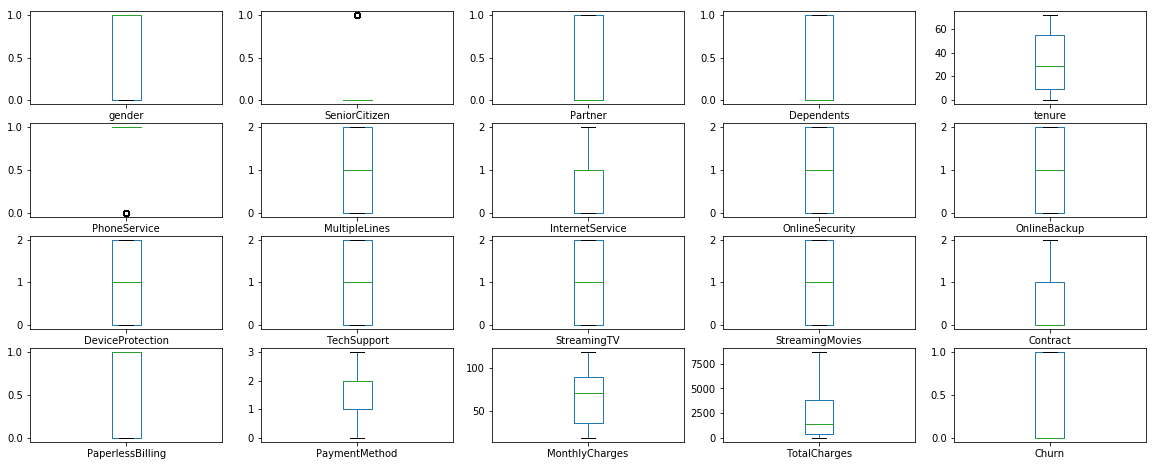

In [13]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize=(20,10))
plt.show()

Através dos gráficos acima, verificamos que não temos outliers no dataset. Com esse resultado, não vou fazer esse tratamento de outliers. 

In [14]:
# Distribuição da varíavel TARGET
df.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

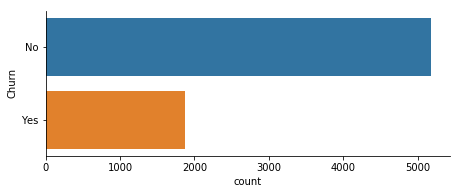

In [15]:
ax = sns.catplot(y="Churn", kind="count", data=df_grafico, height=2.6, aspect=2.5, orient='h')

# Analise Exploratória dos dados

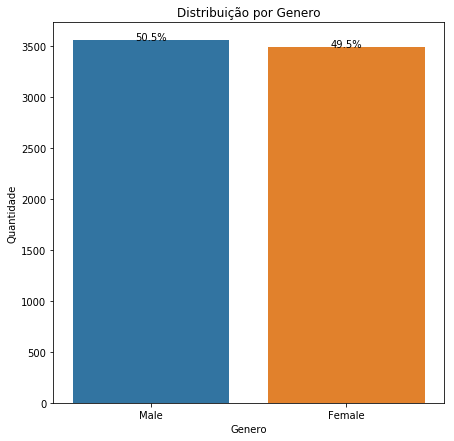

In [16]:
# Gráfico - Genero

fig = plt.figure(figsize = (7,7))
ax = sns.barplot(y = df_grafico['gender'].value_counts(),x = df_grafico['gender'].value_counts().index)
plt.xlabel("Genero")
plt.ylabel("Quantidade")
plt.title('Distribuição por Genero')
total = len(df_grafico['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width()/2.5)
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))
        
plt.show()


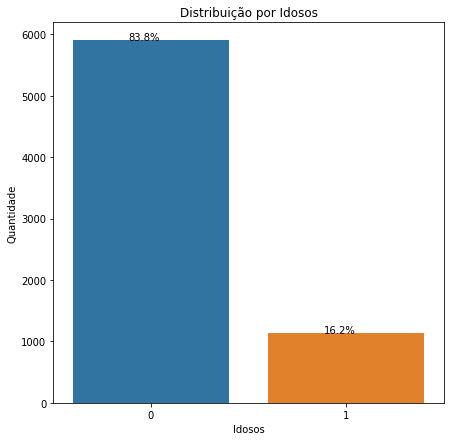

In [17]:
# Distribuição por Idosos
plt.figure(figsize=(7,7))
ax=sns.barplot(x=df_grafico['SeniorCitizen'].value_counts().index,
              y=df_grafico['SeniorCitizen'].value_counts().values)
plt.xlabel('Idosos')
plt.ylabel('Quantidade')
plt.title('Distribuição por Idosos')
total = len(df['SeniorCitizen'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width()/2.8)
        y = p.get_y() + p.get_height() - 0.02
        ax.annotate(percentage, (x, y))
plt.show()


In [18]:
df_grafico['Percentual'] = df_grafico['Churn'].replace("No", 0).replace("Yes", 1)
df_grafico['Genero'] = df_grafico['gender'].replace("Female", "Feminino").replace("Male", "Masculino")
df_grafico['Idoso'] = df_grafico['SeniorCitizen'].replace("0", "Nao").replace("1", "Sim")

df_grafico.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Percentual,Genero,Idoso
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,Feminino,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,0,Masculino,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Masculino,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,Masculino,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Feminino,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Feminino,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,Masculino,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,Feminino,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Feminino,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,Masculino,0


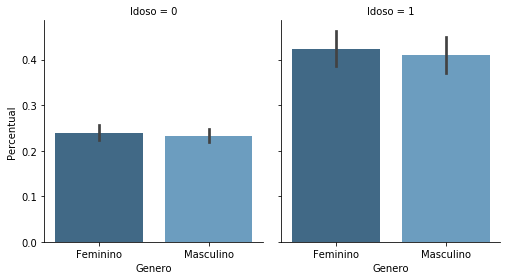

In [19]:

g = sns.FacetGrid(df_grafico, col="Idoso", height=4, aspect=.9)
ax = g.map(sns.barplot, "Genero", "Percentual", palette = "Blues_d", order= ['Feminino', 'Masculino'])


O gênero não é um indicativo de rotatividade.

Os clientes idosos representam somente 16% do total de clientes, mas têm uma taxa de rotatividade muito maior: 42% contra 23% para clientes não seniores.


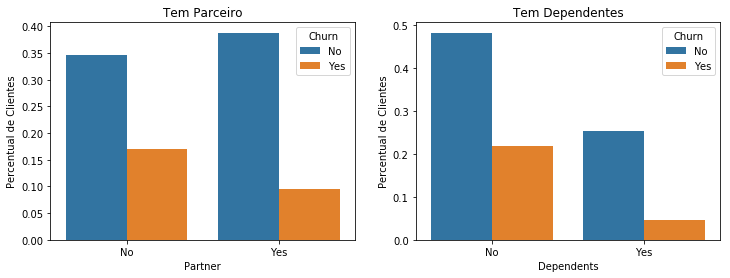

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Tem Parceiro")
axis[1].set_title("Tem Dependentes")
axis_y = "Percentual de Clientes"
# Plot Partner column
gp_partner = df_grafico.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df_grafico.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

Clientes que não possuem parceiros/conjugues tem mais chances de cancelar o serviço. 

Clientes sem dependentes tem mais chances de cancelar o serviço. 

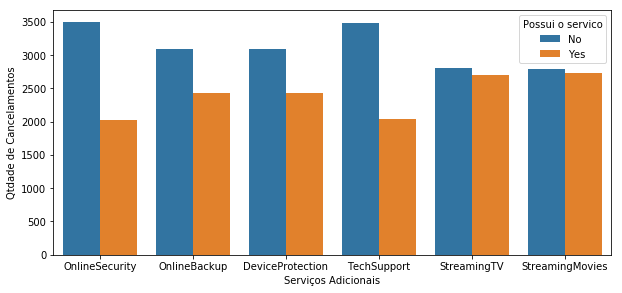

In [21]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

plt.figure(figsize=(10, 4.5))
df1 = df_grafico[(df_grafico.InternetService != "No") & (df_grafico.Churn == "Yes")]
df1 = pd.melt(df_grafico[df_grafico["InternetService"] != 'No'][cols]).rename({'value': 'Possui o servico'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Possui o servico', hue_order=['No', 'Yes'])
ax.set(xlabel='Serviços Adicionais', ylabel='Qtdade de Cancelamentos')
plt.show()

Os clientes que não possuem os 4 primeiros serviços adicionais (OnlineSecurity a TechSupport) são mais propensos ao cancelamento, ou seja, quanto maior o número de serviços adicionais, menor a chance do Churn acontecer. Os serviços de Streaming não são relevante ao  are more unlikely to churn
Streaming service is not predictive for churn

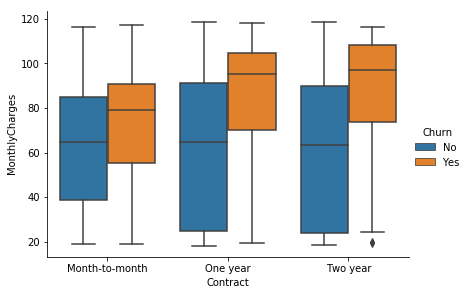

In [22]:
#Contrato com Cobrança mensal e Churn
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df_grafico, height=4.2, aspect=1.4)

Contratos mais longos são mais afetados por encargos mensais mais altos o que tende a aumentar as chances de cancelamento. 


# Hipóteses

    I. O gênero (Masculino/Feminino) possuem relação / influência com o cancelamento dos contratos?
    II. O tempo total que o cliente está fiel ao contrato atual possui relação com o cancelamento? 
    III. O valor cobrado mensalmente pelo serviço tem influência / relação com a fidelização ?

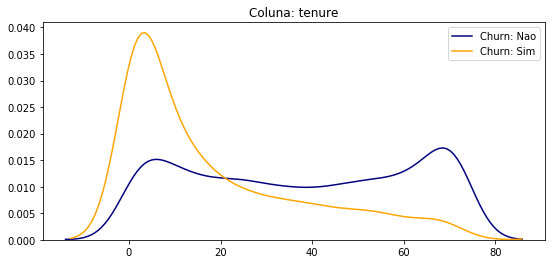

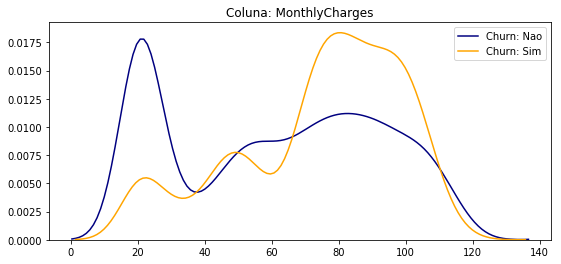

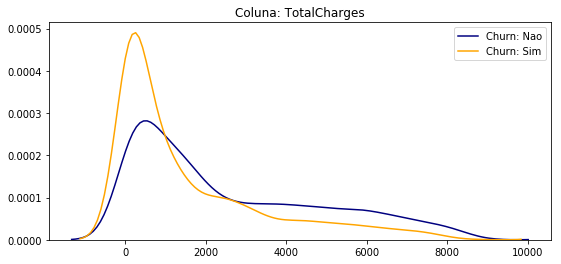

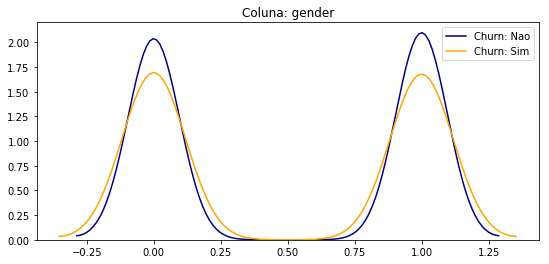

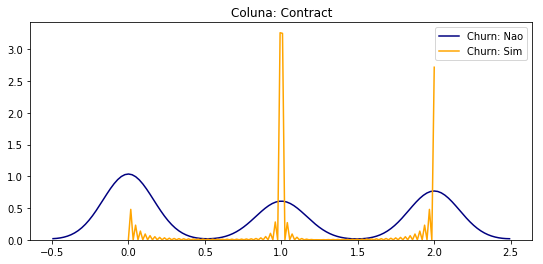

In [23]:
#Gráficos - seaborn kdeplot
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("Coluna: {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature].dropna(), color= 'navy', label= 'Churn: Nao')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature].dropna(), color= 'orange', label= 'Churn: Sim')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')
kdeplot('gender')
kdeplot('Contract')

Através dos gráficos acima, podemos afirmar que: 

1) Clientes com taxas mensais mais altas têm maior probabilidade de cancelar o contrato;

2) MonthlyCharges, Contract e TotalCharges são provavelmente colunas importantes e influenciam no cancelamento; 

3) Gênero e Tenure não possuem influência / relação com o cancelamento dos contratos. 

Desta forma, seguem as respostas das hipóteses: 

    I. O gênero (Masculino/Feminino) possuem relação / influência com o cancelamento dos contratos?
        Não há relação e/ou influencia no cancelamento baseado no gênero. 
        
    II. O tempo total que o cliente está fiel ao contrato atual possui relação com o cancelamento? 
        Não há relação e/ou influencia no cancelamento baseado no tempo de contrato. 
    
    III. O valor cobrado mensalmente pelo serviço tem influência / relação com a fidelização ?
        O valor cobrado mensalmente tem sim relação e influência no Churn, sendo que os clientes com taxas mensais mais altas têm maior probabilidade de cancelar o contrato.


# Correlação 

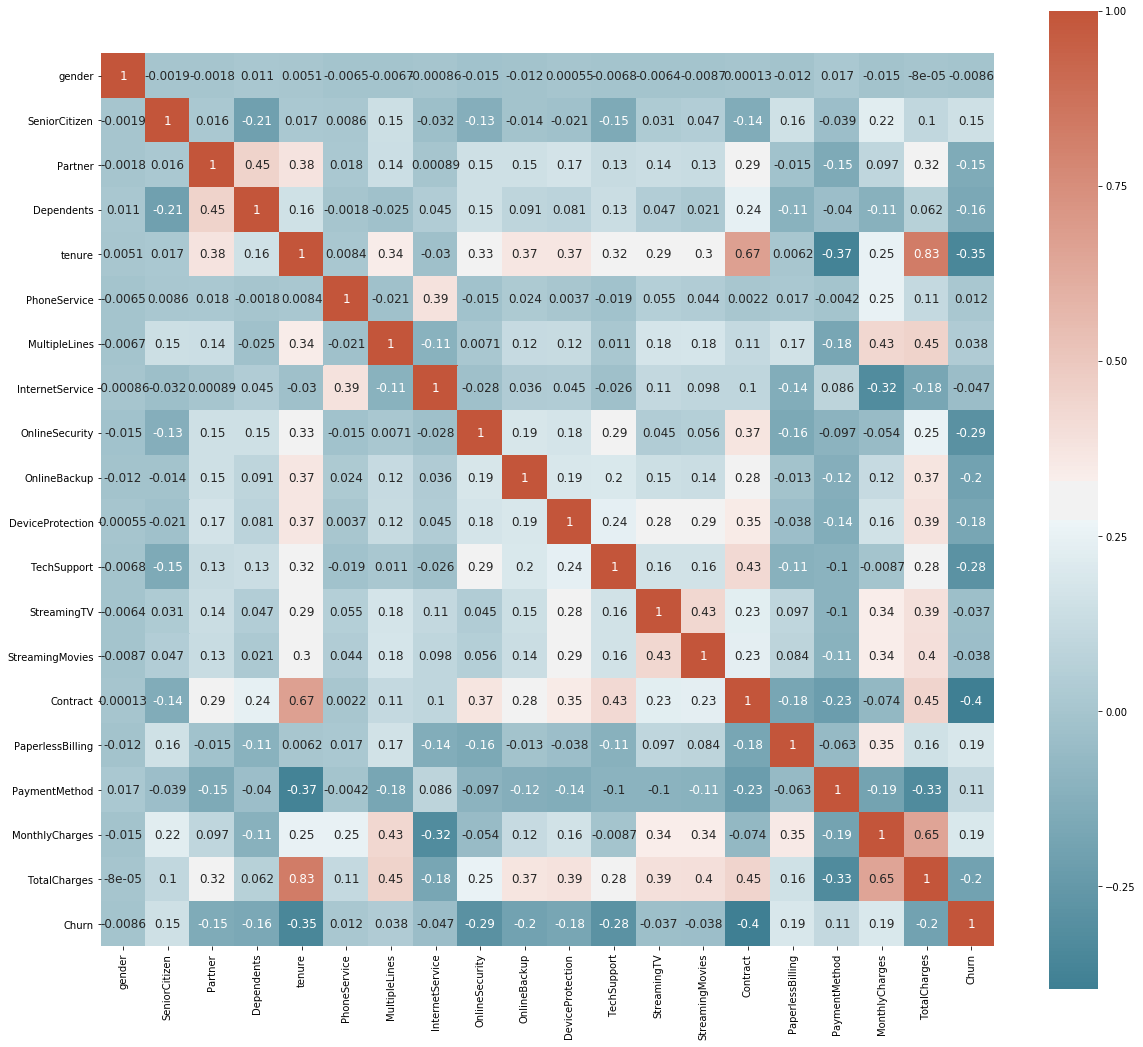

In [24]:
#Dados de Correlação entre as variáveis
corr = df.corr()
_ , ax = plt.subplots( figsize =( 20 , 20 ) )
cmap = sns.diverging_palette( 220 , 20 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })

In [25]:
# Correlação com a variavel TARGET
correlations_data = df[df.columns.drop('Churn')].corrwith(df.Churn).sort_values()
# Correlacao Negativa a Positiva
print(correlations_data.head(20))


Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198324
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
dtype: float64


Verificado a correlação com a varíavel TARGET (Churn), cujas variáveis mais assertivas são: 

PaymentMethod, PaperlessBilling, MonthlyCharges, MultipleLines, Contract, OnlineSecurity e InternetService

Sugestão de possível uso somente delas no modelo preditivo para o modelo de machine learning. 



In [26]:
# Verificando o skew de cada atributo
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
Churn               1.063031
dtype: float64

# Montagem dos Modelos Preditivos

Neste projeto será desenvolvido vários algoritmos de machine learning de aprendizagem supervisionada através de um dataset de clientes de telecom cujo objetivo será de Classificação binária.   
    
Após a análise exploratória, feita acima, será feito uma análise de correlação das varíaveis exploratórias com a Target (Churn) e farei um pré-processamento com o Random Forest para descobrimos as variáveis mais relevantes. Os dados serão manipulados e transformados em números através das funções do python (Pandas, LabelEncoder, OneHotEncoder, etc.;).

Os dados serão divididos na proporção de 70% para treino e 30% para teste. Serão utilizados no mínimo 4 algoritmos (Naive Bayes, Random forest, KNN Classifier e XGBoost Classifier) e demonstrados seus resultados de acurária das predições do dados de teste, após isso, iremos otimizar o melhor modelo para aumentarmos ainda mais sua acucária. O objetivo final é atingir ao menos 75% de acurária. Será demonstrado também a tabela de confusão (confusion matrix) e a curva ROC do melhor modelo. 

In [27]:
# Importando o dataSet
df = pd.read_csv('data/dataset.csv')

In [28]:
# Transformando as colunas String em números para futuro processamento do modelo preditivo. 
from sklearn.preprocessing import LabelEncoder

labelencoder_columns = LabelEncoder()
df['gender'] = labelencoder_columns.fit_transform(df['gender'])
df['Partner'] = labelencoder_columns.fit_transform(df['Partner'])
df['Dependents'] = labelencoder_columns.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder_columns.fit_transform(df['PhoneService'])
df['MultipleLines'] = labelencoder_columns.fit_transform(df['MultipleLines'])
df['InternetService'] = labelencoder_columns.fit_transform(df['InternetService'])
df['OnlineSecurity'] = labelencoder_columns.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder_columns.fit_transform(df['OnlineBackup'])
df['TechSupport'] = labelencoder_columns.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder_columns.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder_columns.fit_transform(df['StreamingMovies'])
df['DeviceProtection'] = labelencoder_columns.fit_transform(df['DeviceProtection'])
df['Contract'] = labelencoder_columns.fit_transform(df['Contract'])
df['PaperlessBilling'] = labelencoder_columns.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = labelencoder_columns.fit_transform(df['PaymentMethod'])
df['Churn'] = labelencoder_columns.fit_transform(df['Churn'])

#Apagando a coluna customerID pois ela não representa um dado válido para o modelo preditivo. 
df = df.drop('customerID', axis=1)

# Resolvendo o problema de espaços em branco na coluna TotalCharges
df['TotalCharges'] = df['TotalCharges'].map(lambda x: 0.0 if x == ' ' else x )

#Ajustando o tipo da coluna TotalCharges para float
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, downcast='float')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


In [29]:
# Separando os dados
array = df.values
colunas = df.columns[0:19]

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:19]
Y = array[:,19]


In [30]:
X.shape, Y.shape, colunas

((7043, 19),
 (7043,),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges'],
       dtype='object'))

In [31]:
# Normalizando e padronizando os dados do dataframe

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)

In [32]:
#Montando novo DataFrame com Churn e as colunas normalizadas na escala e Padronizadas
df_new = pd.DataFrame (data=standardX, columns=colunas)
df_new['Churn'] = df['Churn']

df_new.head(10)

array1 = df_new.values
X1 = array1[:,0:19]
Y1 = array1[:,19]
Y1 = Y1.astype(int)


In [33]:
X1.shape, Y1.shape

((7043, 19), (7043,))

In [34]:
#Gerando dados de Treino e de Teste para os modelos - 70% dos dados para Treino e 30% para Teste
from sklearn.model_selection import train_test_split

seed = 1313
X_treino, X_teste, y_treino, y_teste = train_test_split(X1, Y1, test_size = 0.30, random_state = seed)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [35]:
# Feature selection com Random Forest - Escolhendo as melhores colunas
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(random_state=seed)
selector = clf.fit(X_treino, y_treino)
fs = SelectFromModel(selector, prefit=True)

X_treino_new = fs.transform(X_treino)
X_teste_new = fs.transform(X_teste)

#Pegando as colunas selecionadas
feature_idx = fs.get_support()
feature_idx = np.append(feature_idx, [False])
colunasSelecionadas = df_new.columns[feature_idx]

print(X_treino_new.shape, X_teste_new.shape)
print("Colunas Selecionadas => " , colunasSelecionadas)

(4930, 5) (2113, 5)
Colunas Selecionadas =>  Index(['tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


Através do feature selection, obtivemos as melhores varíaveis para nosso modelo preditivo, são elas: 

tenure, OnlineSecurity, Contract, MonthlyCharges e TotalCharges


# Seleção do Modelo Preditivo

LR: 0.802231 (0.019376)
LDA: 0.796957 (0.016465)
NB: 0.751724 (0.020868)
KNN: 0.746247 (0.022921)
CART: 0.729817 (0.015389)
RandForest: 0.777485 (0.017356)
SVM: 0.795740 (0.020687)




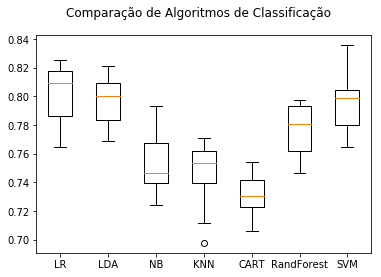

In [36]:
# Importando as bibliotecas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Definindo os valores para o número de folds
num_folds = 10
seed = 1313

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('RandForest', RandomForestClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X_treino, y_treino, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
print("\n")
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()


Nessa primeira versão, os modelos clássificos tiveram uma acurácia entre 73% a 80%, cujo melhor modelo foi o Regressão Logística com 80,22%. Lembrando que todos esses modelos estão com os seus Hyper parâmetros em default. Foram utilizadas todas as varíaveis para o treino do modelo. 

In [37]:
#Criando o modelo 2 - XGBClassifier
#!pip install xgboost
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

modelo2 = XGBClassifier(n_estimators=110, nthread=-1, seed=seed)

# Treinando o modelo
modelo2.fit(X_treino, y_treino, eval_metric="auc", verbose = False)

# Fazendo previsões
y_pred = modelo2.predict(X_teste)
previsoes = [round(value) for value in y_pred]

#Resultado do Modelo - Versao 2
resultado2 = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo 2 - XGBClassifier: %.3f" % (resultado2 * 100.0))

Acuracia do Modelo 2 - XGBClassifier: 79.413


# Escolhido o melhor modelo com o algoritmo de Regressão Logística - LogisticRegression

## Otimizando o modelo

In [38]:
# Import dos módulos
from sklearn.model_selection import RandomizedSearchCV

iterations = 15

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X1, Y1)

# Print dos resultados
print("Acurácia de Treino: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia de Treino: 80.392
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# Prevendo os dados

In [39]:
# Imprimindo relatório do modelo com os dados de prevenção - Dados de Teste

y_pred = rsearch.predict(X_teste)
previsoes = [round(value) for value in y_pred]

#Resultado do Modelo - Versao 1
resultado = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo Otimizado: %.2f" % (resultado * 100.0))

from sklearn.metrics import classification_report
report = classification_report(y_teste, previsoes)

# Imprimindo o relatório
print(report)

Acuracia do Modelo Otimizado: 80.64
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1550
           1       0.66      0.56      0.60       563

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



O modelo otimizado obteve acurácia maior com os dados de teste. Através dos dados de precisão do relatório, observamos que tivermos um acerto muito grande no No-Churn e um acerto ruim no Churn. Provavelmente , isso aconteceu devido a base do dataset ter mais registros de No-Churn do que Churn, o que é muito comum nos dataset's e nas empresas quando estamos fazendo classificações. Por esse motivo, vamos balancear os dados e retreinar o modelo para obtermos uma acucária mais generalista. 

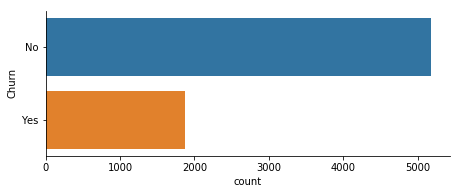

In [40]:
ax = sns.catplot(y="Churn", kind="count", data=df_grafico, height=2.6, aspect=2.5, orient='h')

In [41]:
#!pip install imblearn

In [42]:
# Balanceando os dados - Resampling
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_smt, Y_smt = smt.fit_sample(X1, Y1)

X_smt.shape, Y_smt.shape


((10348, 19), (10348,))

In [43]:
# Mostrando que o balanceamento foi efetuado com sucesso.
import collections
collections.Counter(Y_smt)

Counter({0: 5174, 1: 5174})

In [44]:
# Novos dados de Treino e de Teste
seed = 1313
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smt, Y_smt, test_size = 0.30, random_state = seed)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape


((7243, 19), (3105, 19), (7243,), (3105,))

In [45]:
iterations = 15

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X_smt, Y_smt)

# Print dos resultados
print("Acurácia de Treino: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

# Imprimindo relatório do modelo com os dados de prevenção - Dados de Teste

y_pred = rsearch.predict(X_teste)
probs = rsearch.predict_proba(X_teste)
probs = probs[:, 1]

previsoes = [round(value) for value in y_pred]

#Resultado do Modelo - Versao 1
resultado = accuracy_score(y_teste, previsoes)
print("Acuracia do Modelo Otimizado: %.2f" % (resultado * 100.0))

from sklearn.metrics import classification_report
report = classification_report(y_teste, previsoes)

# Imprimindo o relatório
print(report)

Acurácia de Treino: 77.078
Melhores Parâmetros do Modelo:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Acuracia do Modelo Otimizado: 77.58
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1581
           1       0.75      0.82      0.78      1524

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



Agora sim, o modelo está mais generalista e classificando melhor do que antes, mesmo com a acurácia diminuindo para 77,58%

# Confusion Matrix e Curva ROC do modelo Final


Matriz de confusão normalizada
[[0.73181531 0.26818469]
 [0.17847769 0.82152231]]


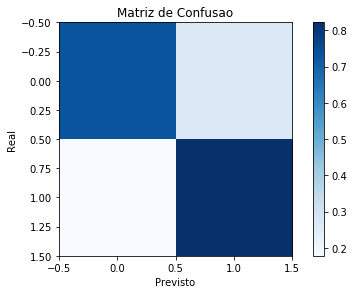

In [46]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show

cm= confusion_matrix(y_teste, previsoes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nMatriz de confusão normalizada')
plt.figure()
plot_confusion_matrix(cm, title='Matriz de Confusao')
print(cm)


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Falso Positivo')
    plt.ylabel('Positivo')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

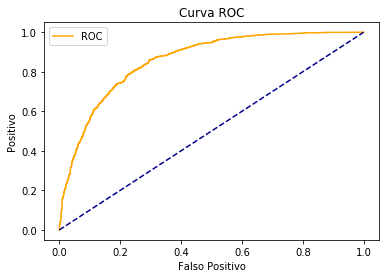

In [48]:
# Curva ROC do modelo
auc = roc_auc_score(y_teste, probs)
fpr, tpr, thresholds = roc_curve(y_teste, probs)
plot_roc_curve(fpr, tpr)

# Conclusões

Predizer um churn, na minha opinião, é muito complicado, mas acredito que o objetivo e os desafios propostos na atividade foram concluídos com êxito. 

# Proposta de Melhoria ou experimento

Bom, eu acredito que podemos melhorar / aumentar a acurária do modelo através da inclusão de mais dados e mais colunas relacionados ao cliente e seus serviços. Sugiro testes com outros algoritmos como o LigthGBD utilizando a técnica de Cross-Validation.

## FIM
## OBRIGADO
